In [732]:
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn
!git clone git://github.com/scikit-learn/scikit-learn.git
!cd scikit-learn
!conda create -n sklearn-env -c conda-forge python=3.9 numpy scipy cython
!conda activate sklearn-env

Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scipy-wheels-nightly/simple


fatal: destination path 'scikit-learn' already exists and is not an empty directory.


^C


Could not find conda environment: sklearn-env
You can list all discoverable environments with `conda info --envs`.



In [991]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import normalvariate
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import shapiro
from scipy.optimize import minimize
import csv
from scipy.stats import f
from scipy.stats import norm
from scipy.stats import t
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KernelDensity
import pylab
import random
#from sklearn.linear_model import QuantileRegressor
import statsmodels.formula.api as smf
from scipy import stats

In [3]:
def law_fun(x):
    return 1.5*x - 2 - 1 / (2 * x)

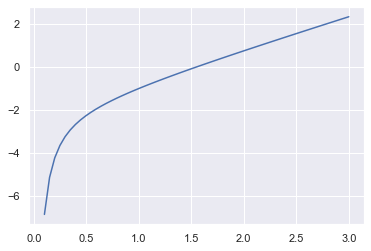

In [1071]:
left_bound = 0.1
right_bound = 2.0
sigma = 1.0
ci_95 = 84
ci_80 = 97
alpha_005 = 0.05
alpha_001 = 0.01
alpha_0005 = 0.005

h_law = np.linspace(left_bound, right_bound + 1.0, sample_size)
y_law = [law_fun(x) for x in h_law]

plt.plot(h_law, y_law, '-')
plt.show()

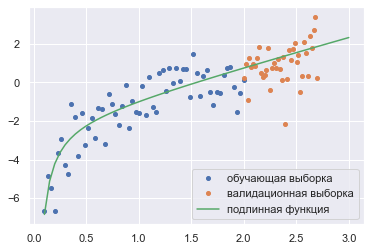

In [1060]:
sample_size = 60
h_data = np.linspace(left_bound, right_bound, sample_size)
y_data = np.array([law_fun(i) + normalvariate(0, sigma) for i in h_data])

test_sample_size = 40
shift = right_bound - left_bound
h_data_test = np.linspace(left_bound + shift, right_bound + 0.7, test_sample_size)
y_data_test = np.array([law_fun(i) + normalvariate(0, sigma) for i in h_data_test])

plt.plot(h_data, y_data, 'o', label='обучающая выборка', markersize=4)
plt.plot(h_data_test, y_data_test, 'o', label='валидационная выборка', markersize=4)
plt.plot(h_law, y_law, '-', label='подлинная функция')
plt.legend()
plt.show()

In [847]:
df = open('data_law.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x-1', 'x', 'x2', 'x3', 'x4', 'x5']])
    for h in h_law:
        writer.writerows([[
            str(1.0),
            str(h**(-1)),
            str(h),
            str(h**2),
            str(h**3),
            str(h**4),
            str(h**5)]])

In [954]:
df = open('data.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x-1', 'x', 'x2', 'x3', 'x4', 'x5', 'y']])
    for i in range(len(h_data)):
        writer.writerows([[
            str(1.0),
            str(h_data[i]**(-1)),
            str(h_data[i]),
            str(h_data[i]**2),
            str(h_data[i]**3),
            str(h_data[i]**4),
            str(h_data[i]**5),
            str(y_data[i])]])

In [955]:
df = open('data_test.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x-1', 'x', 'x2', 'x3', 'x4', 'x5', 'y']])
    for i in range(len(h_data_test)):
        writer.writerows([[
            str(1.0),
            str(h_data_test[i]**(-1)),
            str(h_data_test[i]),
            str(h_data_test[i]**2),
            str(h_data_test[i]**3),
            str(h_data_test[i]**4),
            str(h_data_test[i]**5),
            str(y_data_test[i])]])

In [956]:
df = pd.read_csv('data_law.csv')
X_law = df[['intercept', 'x-1', 'x','x2','x3','x4','x5']]
X1_law = df[['intercept', 'x']]
X2_law = df[['intercept', 'x-1','x','x2']]
X3_law = df[['intercept', 'x-1','x','x2']]
X4_law = df[['intercept', 'x-1','x','x2','x3']]
X5_law = df[['intercept', 'x-1','x','x2','x3','x4']]
X6_law = df[['intercept', 'x-1','x','x2','x3','x4','x5']]

In [969]:
df = pd.read_csv('data.csv')
df_xy = df[['x', 'y']]
y_data = df['y']
X = df[['intercept', 'x-1', 'x','x2','x3','x4','x5']]
X1 = df[['intercept', 'x']]
X2 = df[['intercept', 'x-1','x','x2']]
X3 = df[['intercept', 'x-1','x','x2']]
X4 = df[['intercept', 'x-1','x','x2','x3']]
X5 = df[['intercept', 'x-1','x','x2','x3','x4']]
X6 = df[['intercept', 'x-1','x','x2','x3','x4','x5']]

In [959]:
df_test = pd.read_csv('data_test.csv')
df_xy_test = df_test[['x', 'y']]
y_data_test = df_test['y']
X_test = df_test[['intercept', 'x-1', 'x','x2','x3','x4','x5']]
X1_test = df_test[['intercept', 'x']]
X2_test = df_test[['intercept', 'x-1', 'x','x2']]
X3_test = df_test[['intercept', 'x-1', 'x','x2']]
X4_test = df_test[['intercept', 'x-1', 'x','x2','x3']]
X5_test = df_test[['intercept', 'x-1', 'x','x2','x3','x4']]
X6_test = df_test[['intercept', 'x-1', 'x','x2','x3','x4','x5']]

In [388]:
X

,intercept,x-1,x,x2,x3,x4,x5
0,1.0,10.000000,0.100000,0.010000,0.001000,0.000100,0.000010
1,1.0,7.564103,0.132203,0.017478,0.002311,0.000305,0.000040
2,1.0,6.082474,0.164407,0.027030,0.004444,0.000731,0.000120
3,1.0,5.086207,0.196610,0.038656,0.007600,0.001494,0.000294
4,1.0,4.370370,0.228814,0.052356,0.011980,0.002741,0.000627
5,1.0,3.831169,0.261017,0.068130,0.017783,0.004642,0.001212
6,1.0,3.410405,0.293220,0.085978,0.025211,0.007392,0.002168
7,1.0,3.072917,0.325424,0.105901,0.034463,0.011215,0.003650
8,1.0,2.796209,0.357627,0.127897,0.045739,0.016358,0.005850
9,1.0,2.565217,0.389831,0.151968,0.059242,0.023094,0.009003


In [997]:
def sum_loss(w):
    X = X1.transpose()
    return sum([np.abs(y_data[i] - np.dot(X[i],w)) for i in range(len(y_data))])

def construct_confidence_interval(thetas_hat, alpha, sigma_hat, n, x):
    down_bound = 0.0
    up_bound = 0.0
    add = norm.ppf(alpha) * sigma / np.sqrt(n)
    down_bound = thetas_hat[0] + thetas_hat[1] * x - add
    up_bound = thetas_hat[0] + thetas_hat[1] * x + add
#     for i in range(len(thetas_hat)):
#         down_bound += (thetas_hat[i] - add) * x[i]
#         up_bound += (thetas_hat[i] + add) * x[i]
    return [down_bound, up_bound]

def lr(X, X_test, X_law, model_name, show_method_min_module=False, y_data=y_data, y_data_test=y_data_test, X1=X1, semilogy=False):
    model = LinearRegression(fit_intercept=False).fit(X, y_data)
    
    n, k = len(y_data), len(X.transpose())
    print('n =',n)
    print('k =',k)
    
    coeffs = model.coef_
    print('coeffs:', coeffs)
    
    R2 = model.score(X, y_data)
    print('R^2 =', R2)
    
    errors = y_data - model.predict(X)
    RMSE = np.sqrt((errors**2).sum() / len(y_data))
    print('RMSE =', RMSE)
    
    sigma_hat_2 = (errors**2).sum() / (len(y_data) - len(X.transpose()) - 1)
    HH = np.dot(np.matrix(X).transpose(), np.matrix(X))
    HH_inv = np.linalg.inv(HH)
    
    VIF = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    print('VIF:\n', VIF)
    multicol = False
    for vif in VIF:
        if vif > max(10, 1/(1 + R2)):
            multicol = True
    if multicol:
        print('Матрица H^T * H мультиколлинеарна')
    else:
        print('Матрица H^T * H не мультиколлинеарна')
    
    K_hat = sigma_hat_2 * HH_inv
    print('оценка ковариационной матрицы K:\n', K_hat)
    print('след ковариационной матрицы tr =', np.matrix.trace(K_hat))
    
    A = np.array(len(coeffs)*[1]).transpose()
    mid = np.linalg.inv(np.dot(np.dot(A.reshape(1, len(coeffs)), HH_inv), A.reshape(len(coeffs), 1)))
    num = np.dot(np.dot(coeffs.reshape(1,len(coeffs)), coeffs.reshape(len(coeffs),1)), mid)
    den = len(coeffs) / (n - k) * errors.sum()
    f_stat = num / den
    f_cv_1 = f.ppf([1 - alpha_005] , len(coeffs), n - k)
    f_cv_2 = f.ppf([1 - alpha_001] , len(coeffs), n - k)
    f_cv_3 = f.ppf([1 - alpha_0005] , len(coeffs), n - k)
    if f_stat < f_cv_3:
        print('гипотеза H_0: theta_i=0 принилась на уровне alpha =', alpha_0005)
    elif f_stat < f_cv_2:
        print('гипотеза H_0: theta_i=0 принилась на уровне alpha =', alpha_001)
    elif f_stat < f_cv_1:
        print('гипотеза H_0: theta_i=0 принилась на уровне alpha =', alpha_005)
    else:
        print('гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha =', alpha_005)
    
    A = (len(coeffs)-1)*[0]
    A.append(1)
    A = np.array(A).transpose()
    mid = np.linalg.inv(np.dot(np.dot(A.reshape(1, len(coeffs)), HH_inv), A.reshape(len(coeffs), 1)))
    num = np.dot(np.dot(coeffs.reshape(1,len(coeffs)), coeffs.reshape(len(coeffs),1)), mid)
    den = len(coeffs) / (n - k) * errors.sum()
    f_stat = num / den
    f_cv_1 = f.ppf([1 - alpha_005] , len(coeffs), n - k)
    f_cv_2 = f.ppf([1 - alpha_001] , len(coeffs), n - k)
    f_cv_3 = f.ppf([1 - alpha_0005] , len(coeffs), n - k)
    if f_stat < f_cv_3:
        print('гипотеза H_0: theta_n=0 принилась на уровне alpha =', alpha_0005)
    elif f_stat < f_cv_2:
        print('гипотеза H_0: theta_n=0 принилась на уровне alpha =', alpha_001)
    elif f_stat < f_cv_1:
        print('гипотеза H_0: theta_n=0 принилась на уровне alpha =', alpha_005)
    else:
        print('гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha =', alpha_005)
    
    confidence_intervals_down = []
    confidence_intervals_up = []
    for i in range(len(h_law)):
        [a, b] = t.interval(0.95, i, loc=errors.mean(), scale=stats.sem(errors))
#         [a, b] = construct_confidence_interval(coeffs, 0.95, np.sqrt(sigma_hat_2), n, h_law[i])
        confidence_intervals_down.append(a)
        confidence_intervals_up.append(b)
    
    plt.figure(figsize=(16, 16), dpi=100)
    plt.grid()
    plt.plot(X1['x'], y_data, 'o', label='обучающая выборка')
    plt.plot(X_test['x'], y_data_test, 'o', label='валидационная выборка')
    plt.plot(X_law['x'], np.dot(X_law, model.coef_), 'r', label=model_name)
    plt.plot(h_law, y_law, 'k-', label='подлинная функция')
    plt.plot(h_law, confidence_intervals_down, 'k-')
    plt.plot(h_law, confidence_intervals_up, 'k-')
    
    if show_method_min_module:
        model_min_module = minimize(sum_loss, [-4,3])
        plt.plot(X_law['x'], np.dot(X_law, model_min_module.x), 'y', label='метод наименьших модулей')
        print('min modules coeffs:', model_min_module.x)
        print('Сумма квадратов отклонений на тестовой выборке (МНМ):', ((y_data_test - np.dot(X_test,model_min_module.x))**2).sum())
    if multicol:
        model_ridge = Ridge(alpha=0.3).fit(X, y_data)
        plt.plot(X_law['x'], model_ridge.intercept_ + np.dot(X_law, model_ridge.coef_), 'g', label=model_name + '(ридж-оценка)')
        print('Сумма квадратов отклонений на обучающей выборке (ridge):', ((y_data - model_ridge.predict(X))**2).sum())
    print('Сумма квадратов отклонений на обучающей выборке:', ((y_data - model.predict(X))**2).sum())
    print('Сумма квадратов отклонений на тестовой выборке:', ((y_data_test - model.predict(X_test))**2).sum())
    
    if semilogy:
        plt.yscale('log')
    plt.legend()
    plt.show()
    
    return coeffs, errors, sigma_hat_2

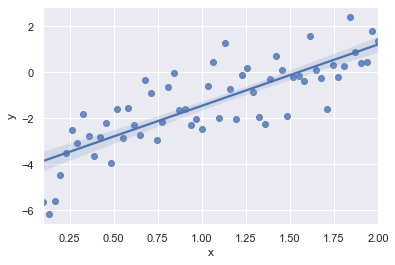

In [1068]:
sns.set_theme(style=None)
ax = sns.regplot(data=df_xy, x='x', y='y', ci=ci_95)
plt.show()

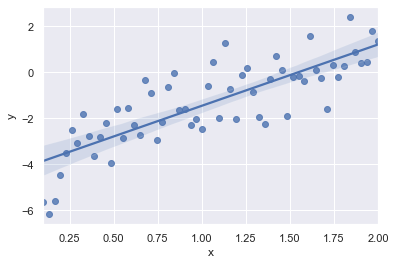

In [1069]:
sns.set_theme(style=None)
ax = sns.regplot(data=df_xy, x='x', y='y', ci=ci_80)
plt.show()

n = 60
k = 2
coeffs: [-4.11904717  2.66255415]
R^2 = 0.6620099696649544
RMSE = 1.0610113225121556
VIF:
 [4.544661913627899, 0.9999999999999998]
Матрица H^T * H не мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 0.08975668 -0.06667311]
 [-0.06667311  0.0634982 ]]
след ковариационной матрицы tr = [[0.15325487]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
min modules coeffs: [-3.82212826  2.36880423]
Сумма квадратов отклонений на тестовой выборке (МНМ): 55.29550291833055
Сумма квадратов отклонений на обучающей выборке: 67.5447015899396
Сумма квадратов отклонений на тестовой выборке: 79.67497515747885


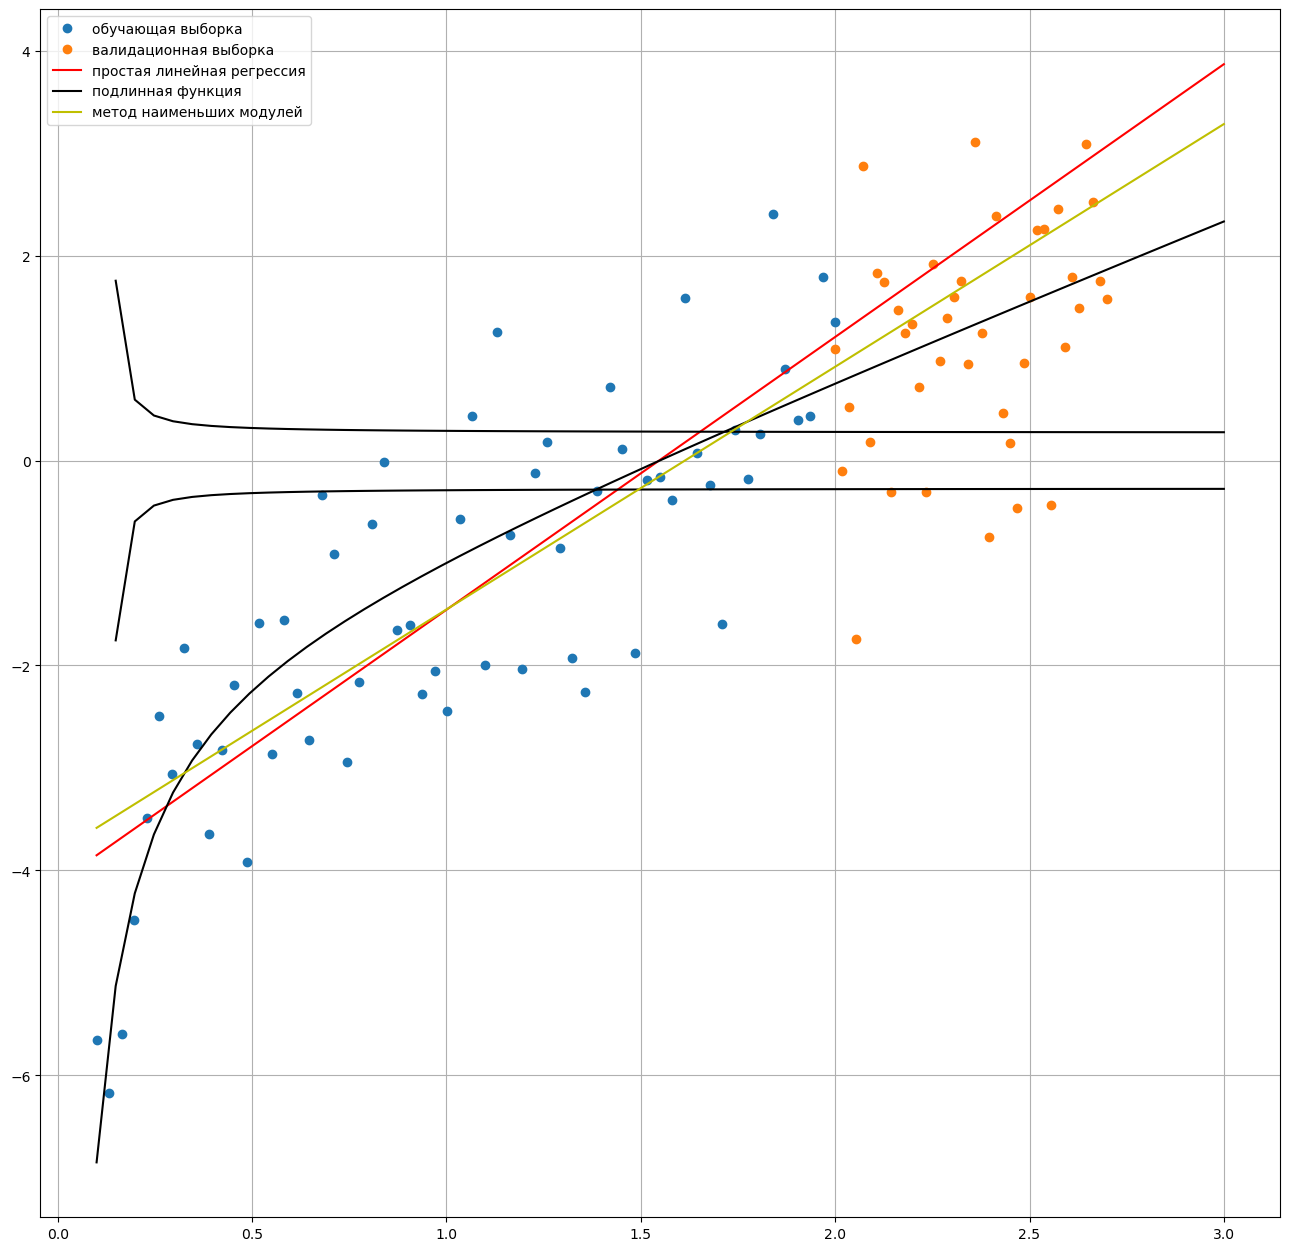

log_likehood = -90.2284626912658
AIC = 0.23640502329951474
AIC_c = 0.4469313390889884
BIC = 188.64561450697582


In [998]:
coeffs, errors, sigma_hat_2 = lr(X1, X1_test, X1_law, 'простая линейная регрессия', show_method_min_module=True)
log_likehood = -len(y_data) / 2.0 * (1 + np.log(2 * np.pi) + np.log(sigma_hat_2))
k = 2
AIC = 2 * k / len(y_data) + np.log(sigma_hat_2)
AIC_c = AIC + 2 * k * (k + 1) / (len(y_data) - k - 1)
BIC = k * np.log(len(y_data)) - 2 * log_likehood
print('log_likehood =', log_likehood)
print('AIC =', AIC)
print('AIC_c =', AIC_c)
print('BIC =', BIC)
# conf_int = t.interval(0.8, df=len(y_data)-2, loc=coeffs[0], scale=coeffs[1])
# print(conf_int)
# plt.plot(conf_int[0], conf_int[1])

In [853]:
def errors_test(X, errors, dl, du):
    plt.hist(errors)
    plt.show()

    shapiro_test = shapiro(errors)
    print('Критерий Шапиро-Уилка')
    print('statistic =', shapiro_test[0],'pvalue =', shapiro_test[1])
    if shapiro_test[1] < 0.05:
        print('распределение ошибок нормальное на уровне значимости 0.05')
    else:
        print('гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять')

    print()
    
    durbin_watson_test = durbin_watson(errors)
    print('значение статистики Дарбина-Уотсона:', durbin_watson_test)
    print('выборочный коэффициент корреляции r =', 1 - durbin_watson_test/2)
    if 0 < durbin_watson_test < dl_60_2:
        print('гопотеза о некоррелированности отвергается')
    elif dl_60_2 < durbin_watson_test < du_60_2:
        print('гопотеза о некоррелированности не пренимается и не отвергается')
    elif du_60_2 < durbin_watson_test < 4 - du_60_2:
        print('гопотеза о некоррелированности принимается')
    elif 4 - du_60_2 < durbin_watson_test < 4 - dl_60_2:
        print('гопотеза о некоррелированности не пренимается и не отвергается')
    else:
        print('гопотеза о некоррелированности отвергается')
        
    print()
    
    het_breuschpagan_test = het_breuschpagan(errors, X)
    print('значение f-статистики Бройша-Пагана', het_breuschpagan_test)
    if het_breuschpagan_test[3] < 0.05:
        print('гипотеза о гетероскедостичности отвергается на уровне значимости 0.05')
    else:
        print('гипотеза о гетероскедостичности принимается на уровне значимости 0.05')

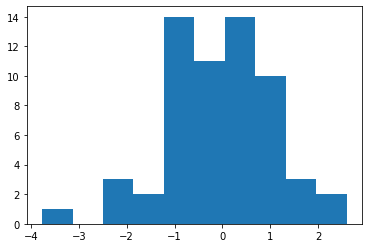

Критерий Шапиро-Уилка
statistic = 0.9763578772544861 pvalue = 0.29435381293296814
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 1.7025721478952764
выборочный коэффициент корреляции r = 0.14871392605236178
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (2.0805650739495363, 0.14918493976034156, 2.0834591090735572, 0.1542821257644679)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [854]:
errors_test(X1, errors, dl=1.55, du=1.62)

<AxesSubplot:xlabel='y', ylabel='Density'>

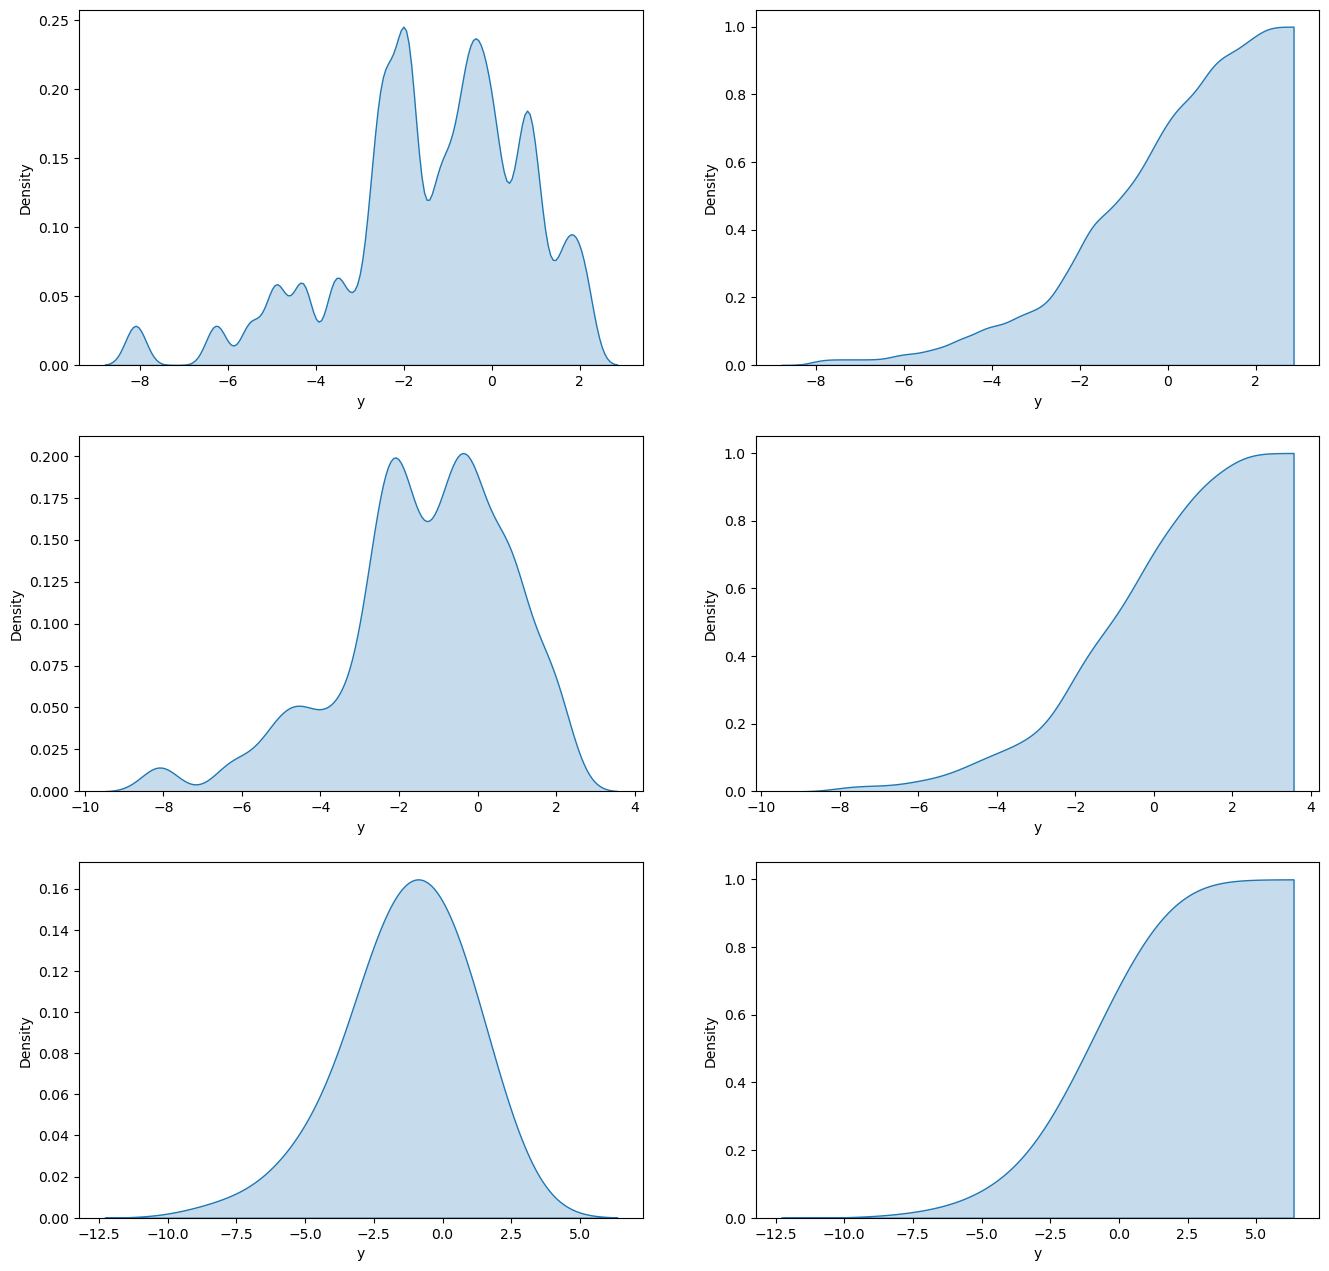

In [548]:
plt.figure(figsize=(16, 16), dpi=100)
pylab.subplot (3, 2, 1)
sns.kdeplot(y_data, fill=True, bw_adjust=0.25, palette="crest", cumulative=False)
pylab.subplot (3, 2, 2)
sns.kdeplot(y_data, shade=True, bw_adjust=0.25, palette="crest", cumulative=True)
pylab.subplot (3, 2, 3)
sns.kdeplot(y_data, shade=True, bw_adjust=0.5, palette="crest", cumulative=False)
pylab.subplot (3, 2, 4)
sns.kdeplot(y_data, shade=True, bw_adjust=0.5, palette="crest", cumulative=True)
pylab.subplot (3, 2, 5)
sns.kdeplot(y_data, shade=True, bw_adjust=1.5, palette="crest", cumulative=False)
pylab.subplot (3, 2, 6)
sns.kdeplot(y_data, shade=True, bw_adjust=1.5, palette="crest", cumulative=True)

n = 60
k = 4
coeffs: [-3.23561663 -0.43473948  3.14163499 -0.46563039]
R^2 = 0.8000624801639338
RMSE = 0.9393789222384511
VIF:
 [80.82242322795281, 4.851446632172911, 58.63003612005568, 42.09320373192414]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 1.29673371 -0.16460186 -1.89931862  0.69607758]
 [-0.16460186  0.02476928  0.22576513 -0.0800344 ]
 [-1.89931862  0.22576513  3.02437274 -1.1652067 ]
 [ 0.69607758 -0.0800344  -1.1652067   0.46609032]]
след ковариационной матрицы tr = [[4.81196606]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
Сумма квадратов отклонений на обучающей выборке (ridge): 53.647683943948564
Сумма квадратов отклонений на обучающей выборке: 52.945965572752435
Сумма квадратов отклонений на тестовой выборке: 33.64725629964665


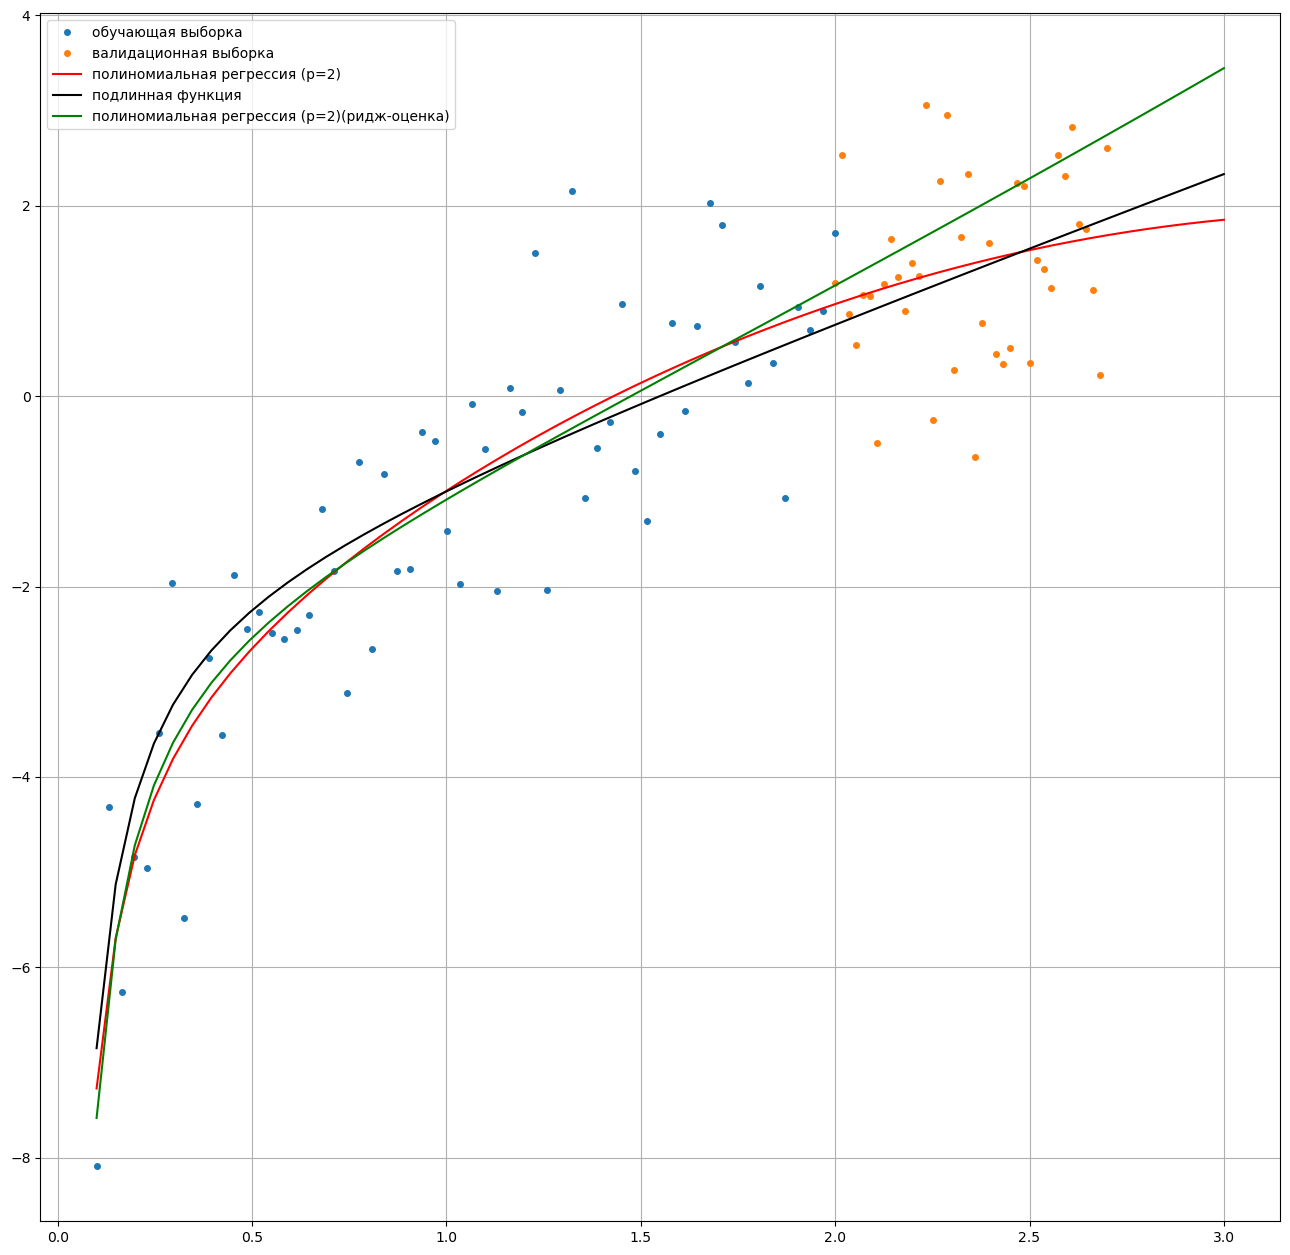

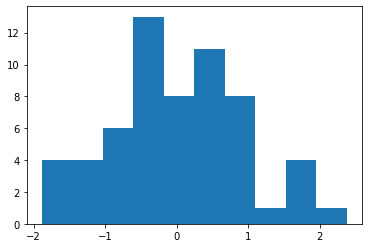

Критерий Шапиро-Уилка
statistic = 0.9862452745437622 pvalue = 0.7346039414405823
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.3710165937138172
выборочный коэффициент корреляции r = -0.18550829685690862
гопотеза о некоррелированности не пренимается и не отвергается

значение f-статистики Бройша-Пагана (1.4858845061546222, 0.6855319900229662, 0.47401401435300466, 0.7016234145403337)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [857]:
coeffs, errors, sigma_hat_2 = lr(X2, X2_test, X2_law, 'полиномиальная регрессия (p=2)')
errors_test(X2, errors, dl=1.51, du=1.65)

n = 60
k = 4
coeffs: [-3.23561663 -0.43473948  3.14163499 -0.46563039]
R^2 = 0.8000624801639338
RMSE = 0.9393789222384511
VIF:
 [80.82242322795281, 4.851446632172911, 58.63003612005568, 42.09320373192414]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 1.29673371 -0.16460186 -1.89931862  0.69607758]
 [-0.16460186  0.02476928  0.22576513 -0.0800344 ]
 [-1.89931862  0.22576513  3.02437274 -1.1652067 ]
 [ 0.69607758 -0.0800344  -1.1652067   0.46609032]]
след ковариационной матрицы tr = [[4.81196606]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
Сумма квадратов отклонений на обучающей выборке (ridge): 53.647683943948564
Сумма квадратов отклонений на обучающей выборке: 52.945965572752435
Сумма квадратов отклонений на тестовой выборке: 33.64725629964665


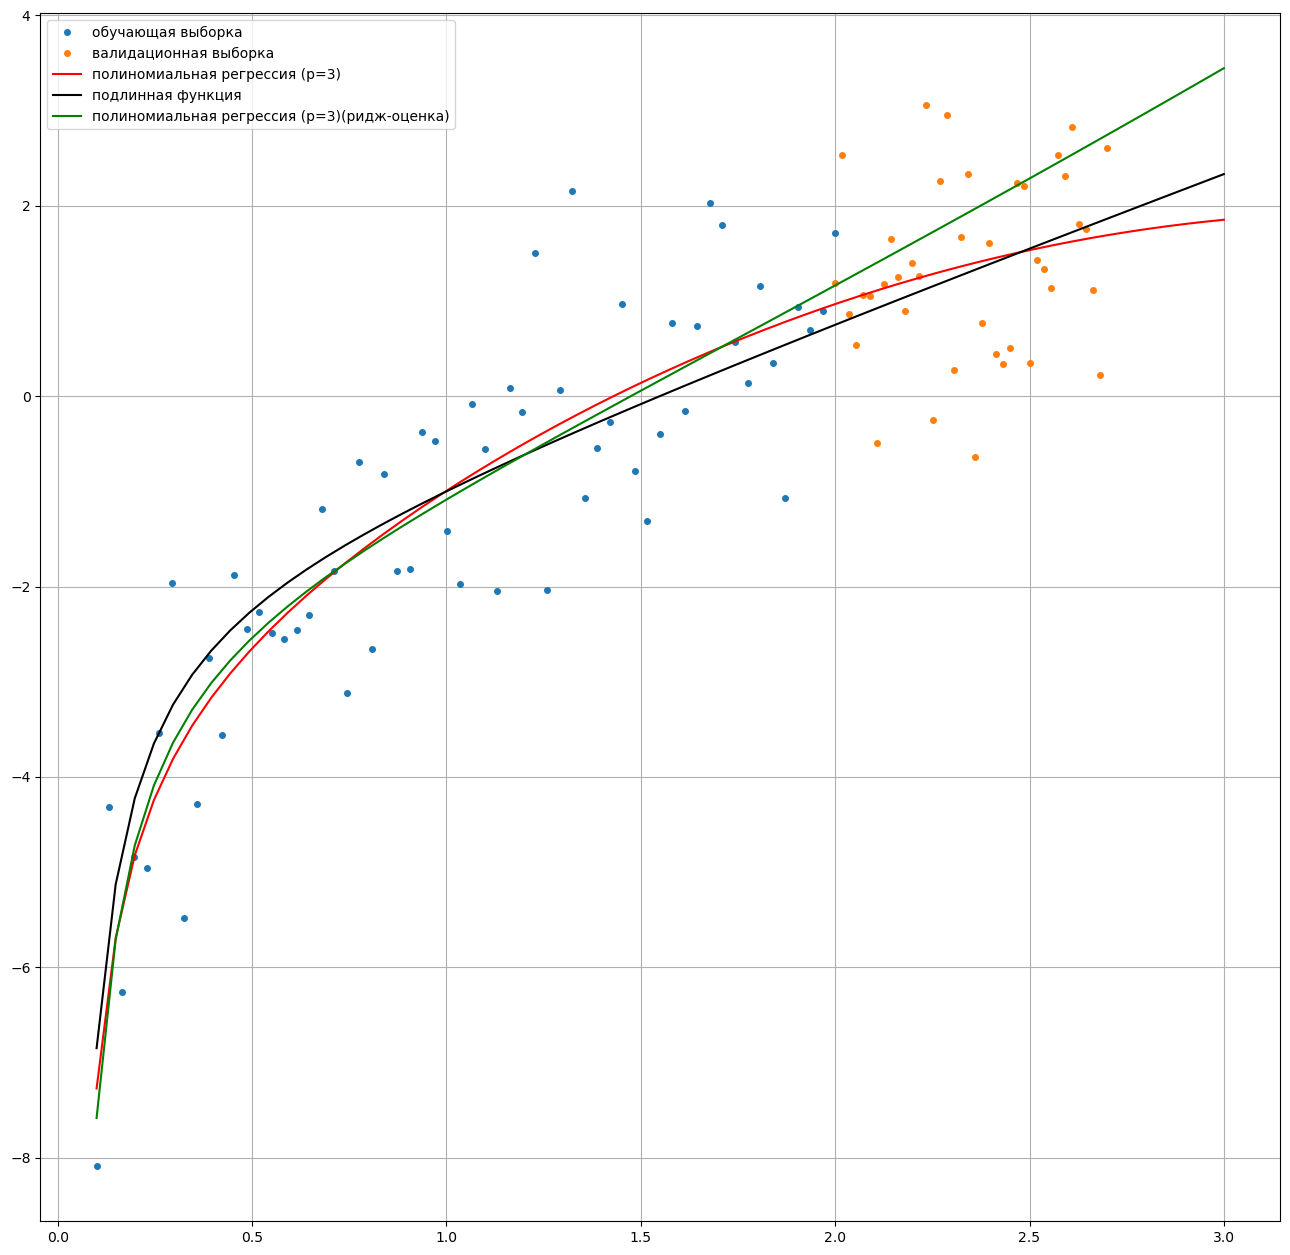

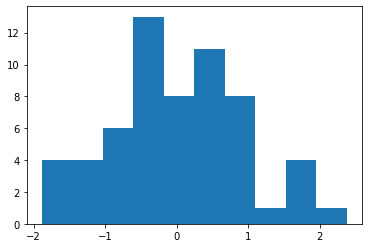

Критерий Шапиро-Уилка
statistic = 0.9862452745437622 pvalue = 0.7346039414405823
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.3710165937138172
выборочный коэффициент корреляции r = -0.18550829685690862
гопотеза о некоррелированности не пренимается и не отвергается

значение f-статистики Бройша-Пагана (1.4858845061546222, 0.6855319900229662, 0.47401401435300466, 0.7016234145403337)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [859]:
coeffs, errors, sigma_hat_2 = lr(X3, X3_test, X3_law, 'полиномиальная регрессия (p=3)')
errors_test(X3, errors, dl=1.48, du=1.69)

n = 60
k = 5
coeffs: [-2.66735902 -0.48577401  1.57195375  0.96543386 -0.40195609]
R^2 = 0.8003579323591128
RMSE = 0.9386845948978474
VIF:
 [328.4596829561021, 11.128134623881984, 646.3252748073695, 2317.7383845727145, 673.6887534938277]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[  5.35954215  -0.53029689 -13.09326744  10.88388223  -2.85821539]
 [ -0.53029689   0.05778182   1.23201918  -0.99528697   0.25669289]
 [-13.09326744   1.23201918  33.90728226 -29.29379023   7.89516398]
 [ 10.88388223  -0.99528697 -29.29379023  26.1005228   -7.19794987]
 [ -2.85821539   0.25669289   7.89516398  -7.19794987   2.02175392]]
след ковариационной матрицы tr = [[67.44688295]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
Сумма квадратов отклонений на обучающей выборке (ridge): 52.98267376639882
Сумма квадратов отклонений на обучающей выборке: 52.867726121912156
Сумма квадратов отклонений на тестовой вы

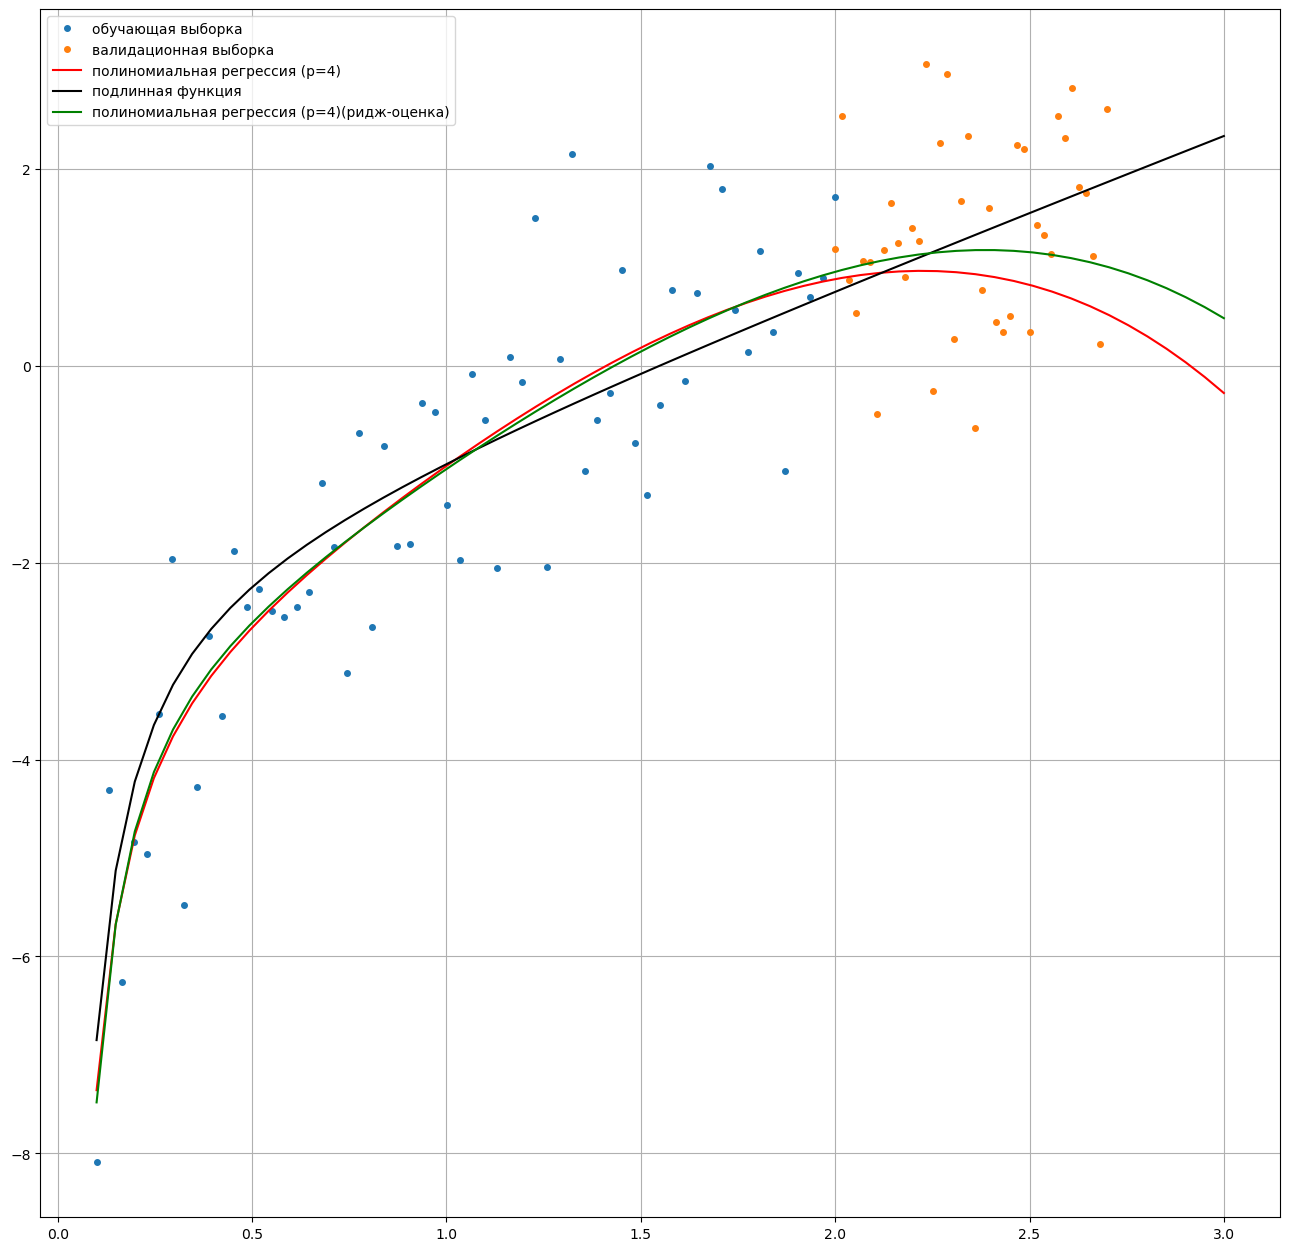

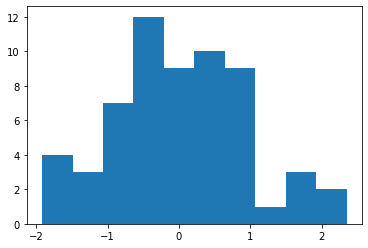

Критерий Шапиро-Уилка
statistic = 0.9887374043464661 pvalue = 0.8548944592475891
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.3703493231235533
выборочный коэффициент корреляции r = -0.18517466156177664
гопотеза о некоррелированности не пренимается и не отвергается

значение f-статистики Бройша-Пагана (4.12490283644122, 0.3893659212540362, 1.0150749954857772, 0.40768871508634735)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [860]:
coeffs, errors, sigma_hat_2 = lr(X4, X4_test, X4_law, 'полиномиальная регрессия (p=4)')
errors_test(X4, errors, dl=1.44, du=1.73)

n = 60
k = 6
coeffs: [-1.1002282  -0.60159779 -4.53687593 10.12924053 -6.09342914  1.23260277]
R^2 = 0.8010034827736869
RMSE = 0.9371657294462359
VIF:
 [1190.4313951237043, 25.924489986338692, 4720.149871470146, 45024.35620501253, 62490.7714677316, 10526.039218575997]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 1.97270116e+01 -1.59426001e+00 -6.89776202e+01  9.45791745e+01
  -5.47790731e+01  1.12348643e+01]
 [-1.59426001e+00  1.36706877e-01  5.36644603e+00 -7.18402589e+00
   4.09477648e+00 -8.30348310e-01]
 [-6.89776202e+01  5.36644603e+00  2.51483176e+02 -3.55341732e+02
   2.10237204e+02 -4.37946032e+01]
 [ 9.45791745e+01 -7.18402589e+00 -3.55341732e+02  5.14924566e+02
  -3.10657284e+02  6.56959350e+01]
 [-5.47790731e+01  4.09477648e+00  2.10237204e+02 -3.10657284e+02
   1.90456671e+02 -4.08025461e+01]
 [ 1.12348643e+01 -8.30348310e-01 -4.37946032e+01  6.56959350e+01
  -4.08025461e+01  8.83661060e+00]]
след ковариационной матрицы tr = [[985.56474292]]
гипоте

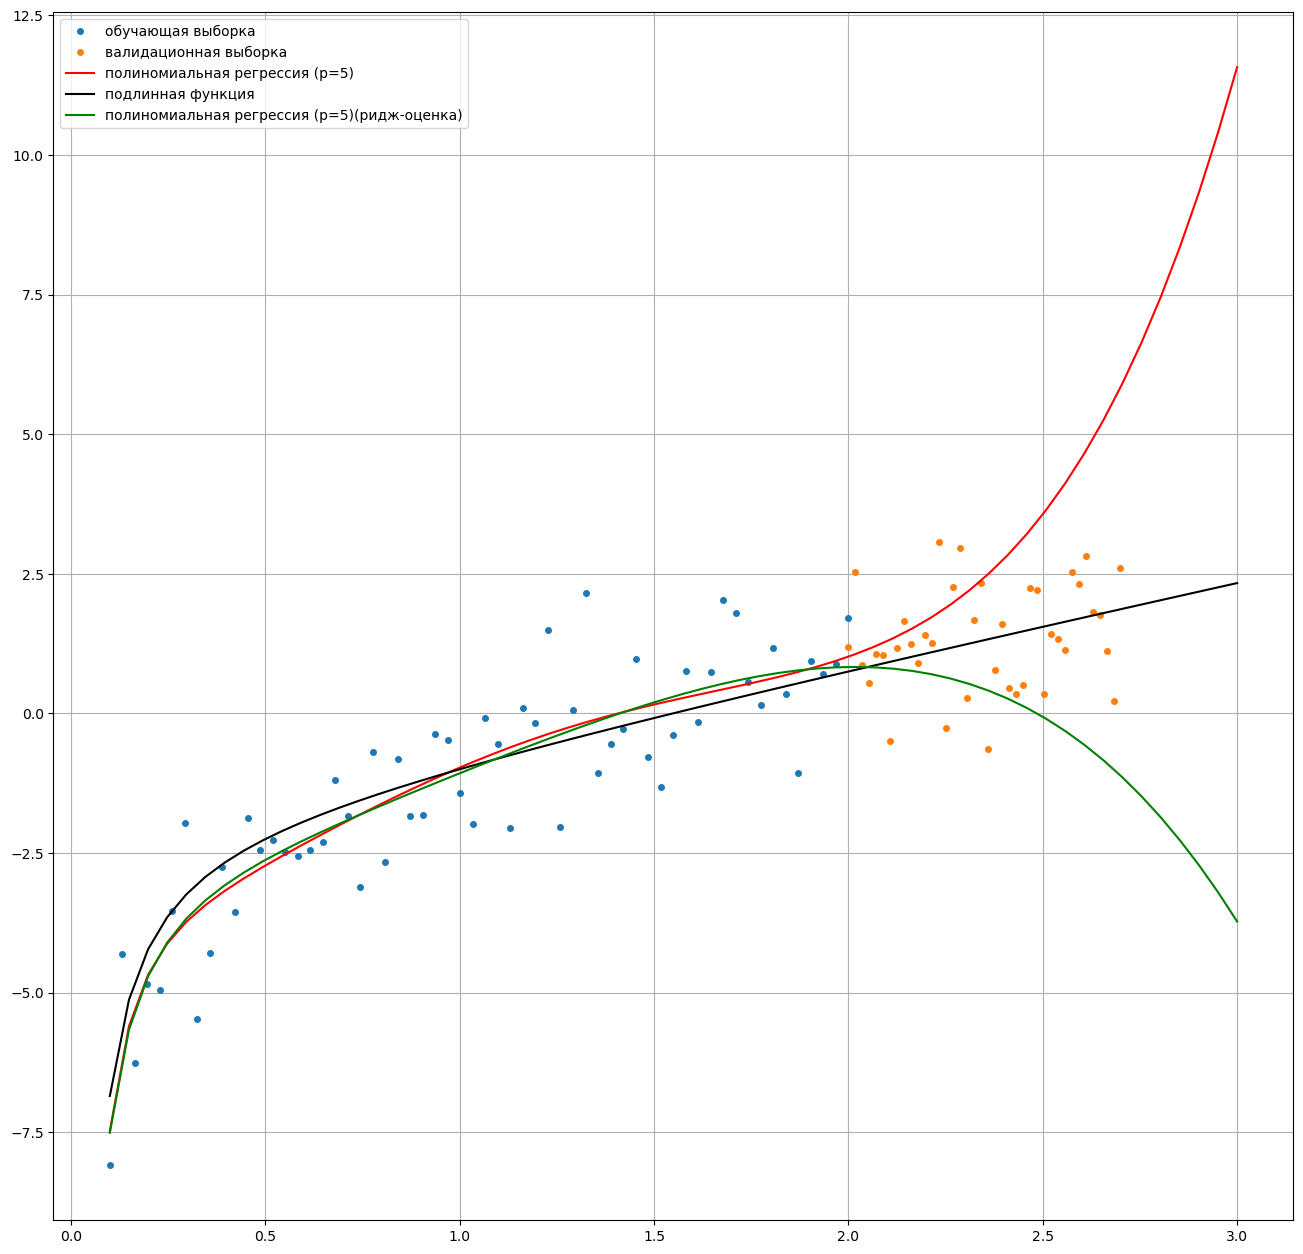

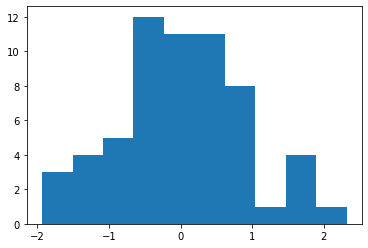

Критерий Шапиро-Уилка
statistic = 0.9885932207107544 pvalue = 0.8485515713691711
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.3677141174645127
выборочный коэффициент корреляции r = -0.18385705873225633
гопотеза о некоррелированности не пренимается и не отвергается

значение f-статистики Бройша-Пагана (5.593124443298656, 0.3478424640546068, 1.1102593811819301, 0.3658878468772996)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [861]:
coeffs, errors, sigma_hat_2 = lr(X5, X5_test, X5_law, 'полиномиальная регрессия (p=5)')
errors_test(X5, errors, dl=1.41, du=1.77)

n = 60
k = 7
coeffs: [-1.89847021 -0.55136505 -0.50463717  1.50011236  2.60629489 -2.85373439
  0.7202337 ]
R^2 = 0.8010543625204519
RMSE = 0.9370459137732128
VIF:
 [4027.9380752215575, 61.2361583779068, 27239.922240239892, 525490.0733852194, 1895038.5799924934, 1478344.4265363023, 165367.36369826848]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 6.80144489e+01 -4.63964400e+00 -3.12314885e+02  6.14323113e+02
  -5.78005402e+02  2.56723909e+02 -4.32308872e+01]
 [-4.63964400e+00  3.29040646e-01  2.06989263e+01 -3.99144770e+01
   3.70332805e+01 -1.62811199e+01  2.72048558e+00]
 [-3.12314885e+02  2.06989263e+01  1.47883759e+03 -2.97845343e+03
   2.85200107e+03 -1.28361189e+03  2.18376454e+02]
 [ 6.14323113e+02 -3.99144770e+01 -2.97845343e+03  6.12381534e+03
  -5.96148012e+03  2.71841545e+03 -4.67333044e+02]
 [-5.78005402e+02  3.70332805e+01  2.85200107e+03 -5.96148012e+03
   5.88518108e+03 -2.71474183e+03  4.71156348e+02]
 [ 2.56723909e+02 -1.62811199e+01 -1.2836118

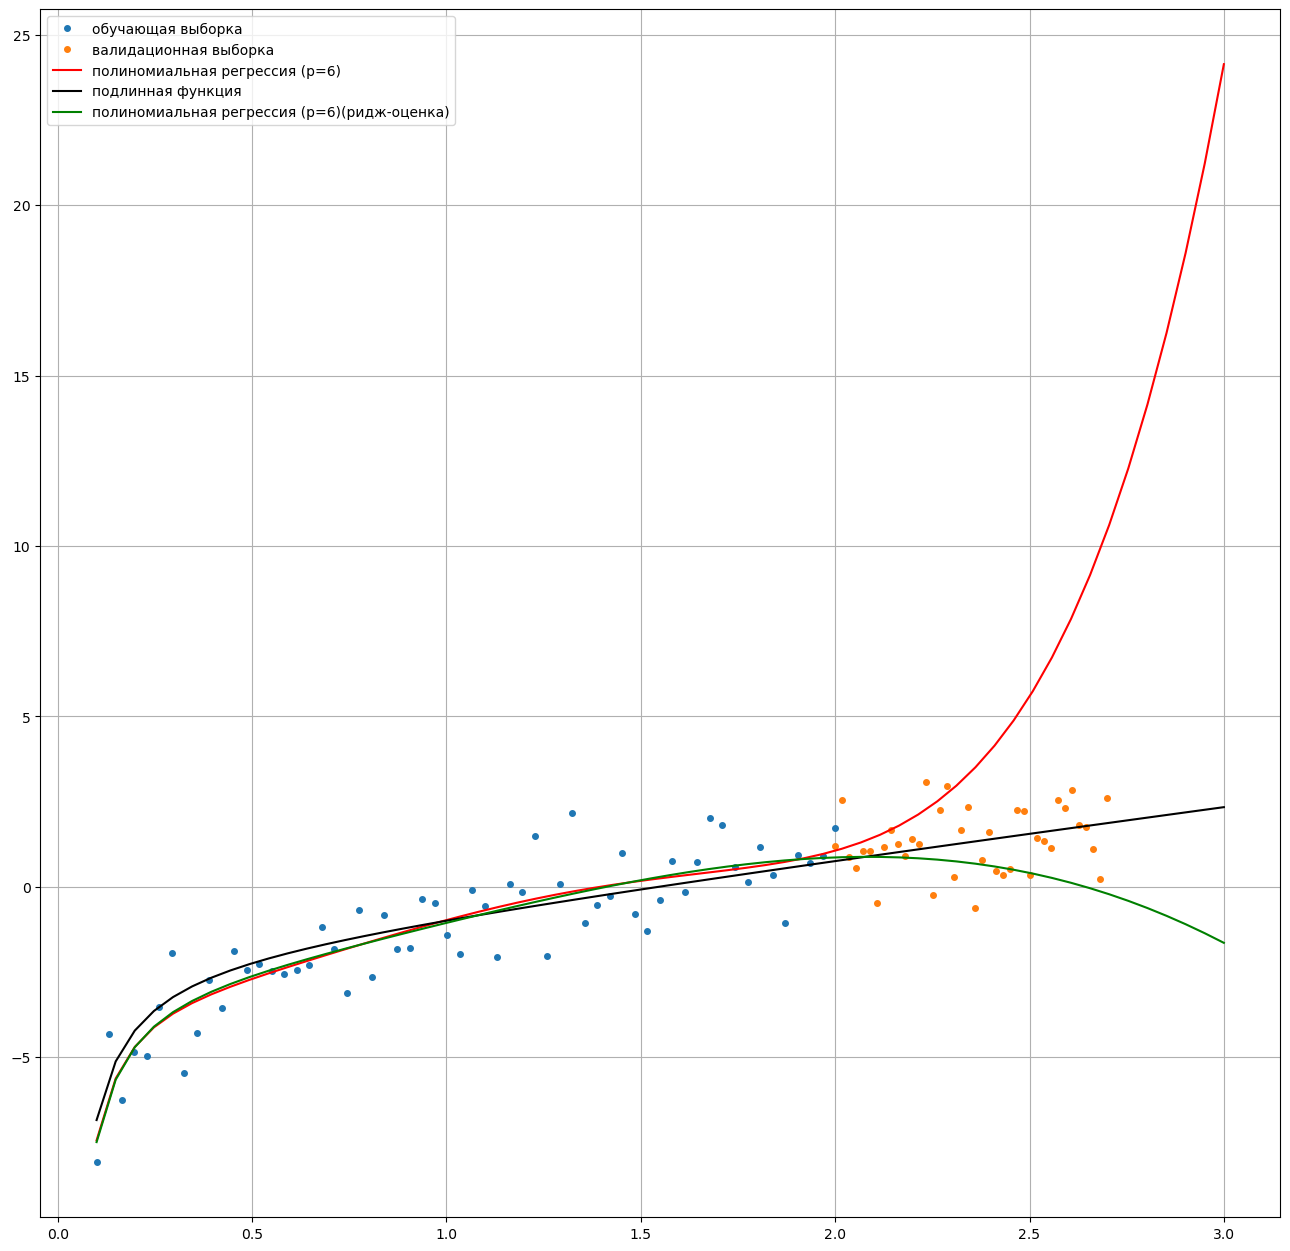

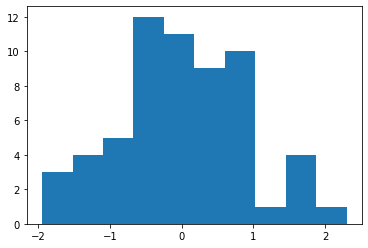

Критерий Шапиро-Уилка
statistic = 0.9883717894554138 pvalue = 0.8386184573173523
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.370607003427117
выборочный коэффициент корреляции r = -0.18530350171355847
гопотеза о некоррелированности не пренимается и не отвергается

значение f-статистики Бройша-Пагана (5.891091327563808, 0.4355001557051297, 0.9617265376484879, 0.460005562916014)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [862]:
coeffs, errors, sigma_hat_2 = lr(X6, X6_test, X6_law, 'полиномиальная регрессия (p=6)')
errors_test(X6, errors, dl=1.37, du=1.81)

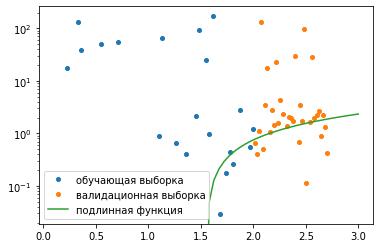

In [888]:
def gen_sample(n, h, delta, sigma, big_sigma):
    u_rand = [random.normalvariate(0, sigma**2) for _ in range(n)]
    v_rand = [random.normalvariate(0, big_sigma**2) for _ in range(n)]
    w_rand = [random.uniform(0.0, 1.0) for _ in range(n)]

    X = [law_fun(h[i]) + u_rand[i] if w_rand[i] > delta else v_rand[i] for i in range(n)]
    return np.array(X)

sample_size = 60
big_sigma = 10.0 * sigma
delta = 0.08
h_data_tukey = np.linspace(left_bound, right_bound, sample_size)
# y_data_tukey = np.array([law_fun(i) + normalvariate(0, sigma) for i in h_data])
y_data_tukey = gen_sample(sample_size, h_data_tukey, delta=0.3, sigma=sigma, big_sigma=big_sigma)

test_sample_size = 40
shift = right_bound - left_bound
h_data_test_tukey = np.linspace(left_bound + shift, right_bound + 0.7, test_sample_size)
# y_data_test_tukey = np.array([law_fun(i) + normalvariate(0, sigma) for i in h_data_test])
y_data_test_tukey = gen_sample(test_sample_size, h_data_test_tukey, delta=0.3, sigma=sigma, big_sigma=big_sigma)

plt.plot(h_data_tukey, y_data_tukey, 'o', label='обучающая выборка', markersize=4)
plt.plot(h_data_test_tukey, y_data_test_tukey, 'o', label='валидационная выборка', markersize=4)
plt.plot(h_law, y_law, '-', label='подлинная функция')
plt.semilogy()
plt.legend()
plt.show()

n = 60
k = 2
coeffs: [-2.44575180e-03 -5.47573163e+00]
R^2 = 0.003012785186144673
RMSE = 55.55264676352997
VIF:
 [4.544661913627899, 0.9999999999999998]
Матрица H^T * H не мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 246.05728963 -182.7764235 ]
 [-182.7764235   174.07278429]]
след ковариационной матрицы tr = [[420.13007392]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
min modules coeffs: [-4.12597722  2.69599383]
Сумма квадратов отклонений на тестовой выборке (МНМ): 95393.279403308
Сумма квадратов отклонений на обучающей выборке: 185165.7937460122
Сумма квадратов отклонений на тестовой выборке: 97963.91028043782


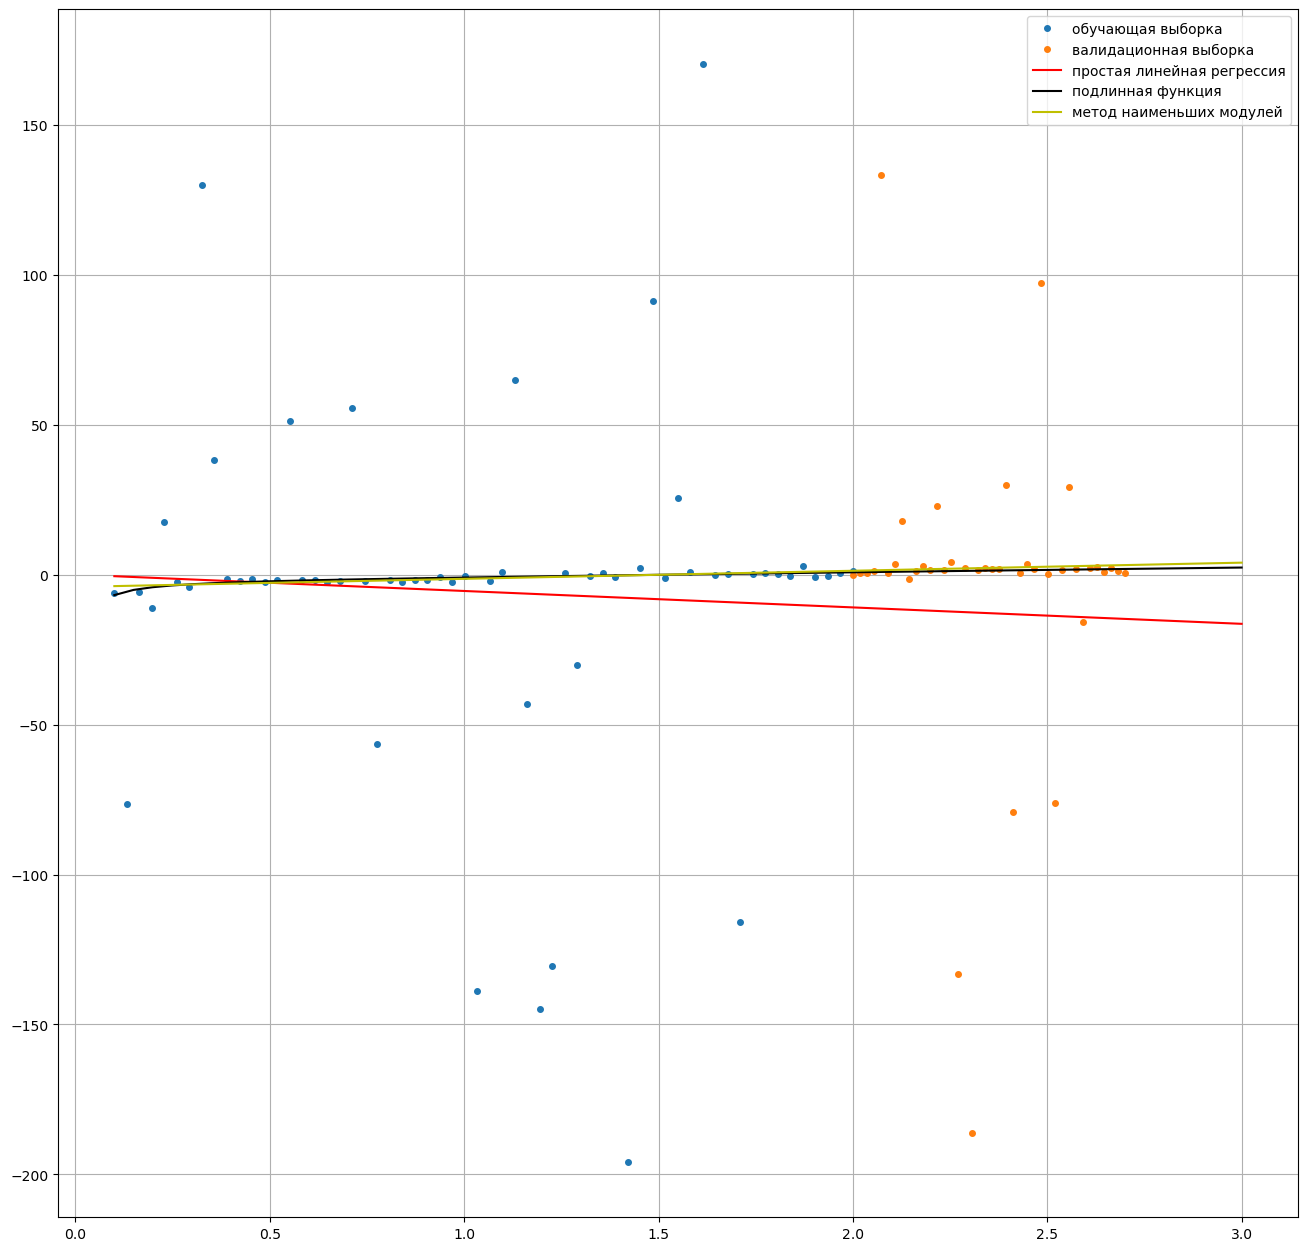

log_likehood = -327.7149805114331
AIC = 8.152622283971757
AIC_c = 8.363148599761232
BIC = 663.6186501473104


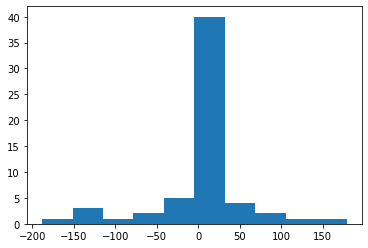

Критерий Шапиро-Уилка
statistic = 0.7756546139717102 pvalue = 3.50636994994602e-08
распределение ошибок нормальное на уровне значимости 0.05

значение статистики Дарбина-Уотсона: 1.7301801142542248
выборочный коэффициент корреляции r = 0.1349099428728876
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (2.9244411851070318, 0.4034221691802943, 0.9564438775923184, 0.41973807343001623)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [892]:
coeffs, errors, sigma_hat_2 = lr(X1, X1_test, X1_law, 'простая линейная регрессия', show_method_min_module=True,
                                 y_data=y_data_tukey, y_data_test=y_data_test_tukey, semilogy=False)
log_likehood = -len(y_data_tukey) / 2.0 * (1 + np.log(2 * np.pi) + np.log(sigma_hat_2))
k = 2
AIC = 2 * k / len(y_data_tukey) + np.log(sigma_hat_2)
AIC_c = AIC + 2 * k * (k + 1) / (len(y_data_tukey) - k - 1)
BIC = k * np.log(len(y_data_tukey)) - 2 * log_likehood
print('log_likehood =', log_likehood)
print('AIC =', AIC)
print('AIC_c =', AIC_c)
print('BIC =', BIC)
# conf_int = t.interval(0.8, df=len(y_data)-2, loc=coeffs[0], scale=coeffs[1])
# print(conf_int)
# plt.plot(conf_int[0], conf_int[1])
errors_test(X2, errors, dl=1.51, du=1.65)

In [899]:
df = open('data_tukey.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x', 'y']])
    for i in range(len(h_data)):
        if abs(y_data_tukey[i] - law_fun(h_data_tukey[i])) < 3 * sigma:
            writer.writerows([[
                str(1.0),
                str(h_data[i]),
                str(y_data[i])]])

In [900]:
df = pd.read_csv('data_tukey.csv')
y_data_tukey = df['y']
X_tukey = df[['intercept', 'x']]

In [901]:
df = open('data_tukey_test.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x', 'y']])
    for i in range(len(h_data_test)):
        if abs(y_data_test_tukey[i] - law_fun(h_data_test_tukey[i])) < 3 * sigma:
            writer.writerows([[
                str(1.0),
                str(h_data_test[i]),
                str(y_data_test[i])]])

In [902]:
df = pd.read_csv('data_tukey_test.csv')
y_data_test_tukey = df['y']
X_test_tukey = df[['intercept', 'x']]

n = 41
k = 2
coeffs: [-4.38854689  2.95375541]
R^2 = 0.6753649158565562
RMSE = 1.1721266632182488
VIF:
 [4.661126069225077, 0.9999999999999998]
Матрица H^T * H не мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 0.1685219  -0.12086521]
 [-0.12086521  0.11036273]]
след ковариационной матрицы tr = [[0.27888463]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
min modules coeffs: [-4.12597722  2.69599383]
Сумма квадратов отклонений на тестовой выборке (МНМ): 51.69101925612836
Сумма квадратов отклонений на обучающей выборке: 56.329117499712986
Сумма квадратов отклонений на тестовой выборке: 72.44745494914261


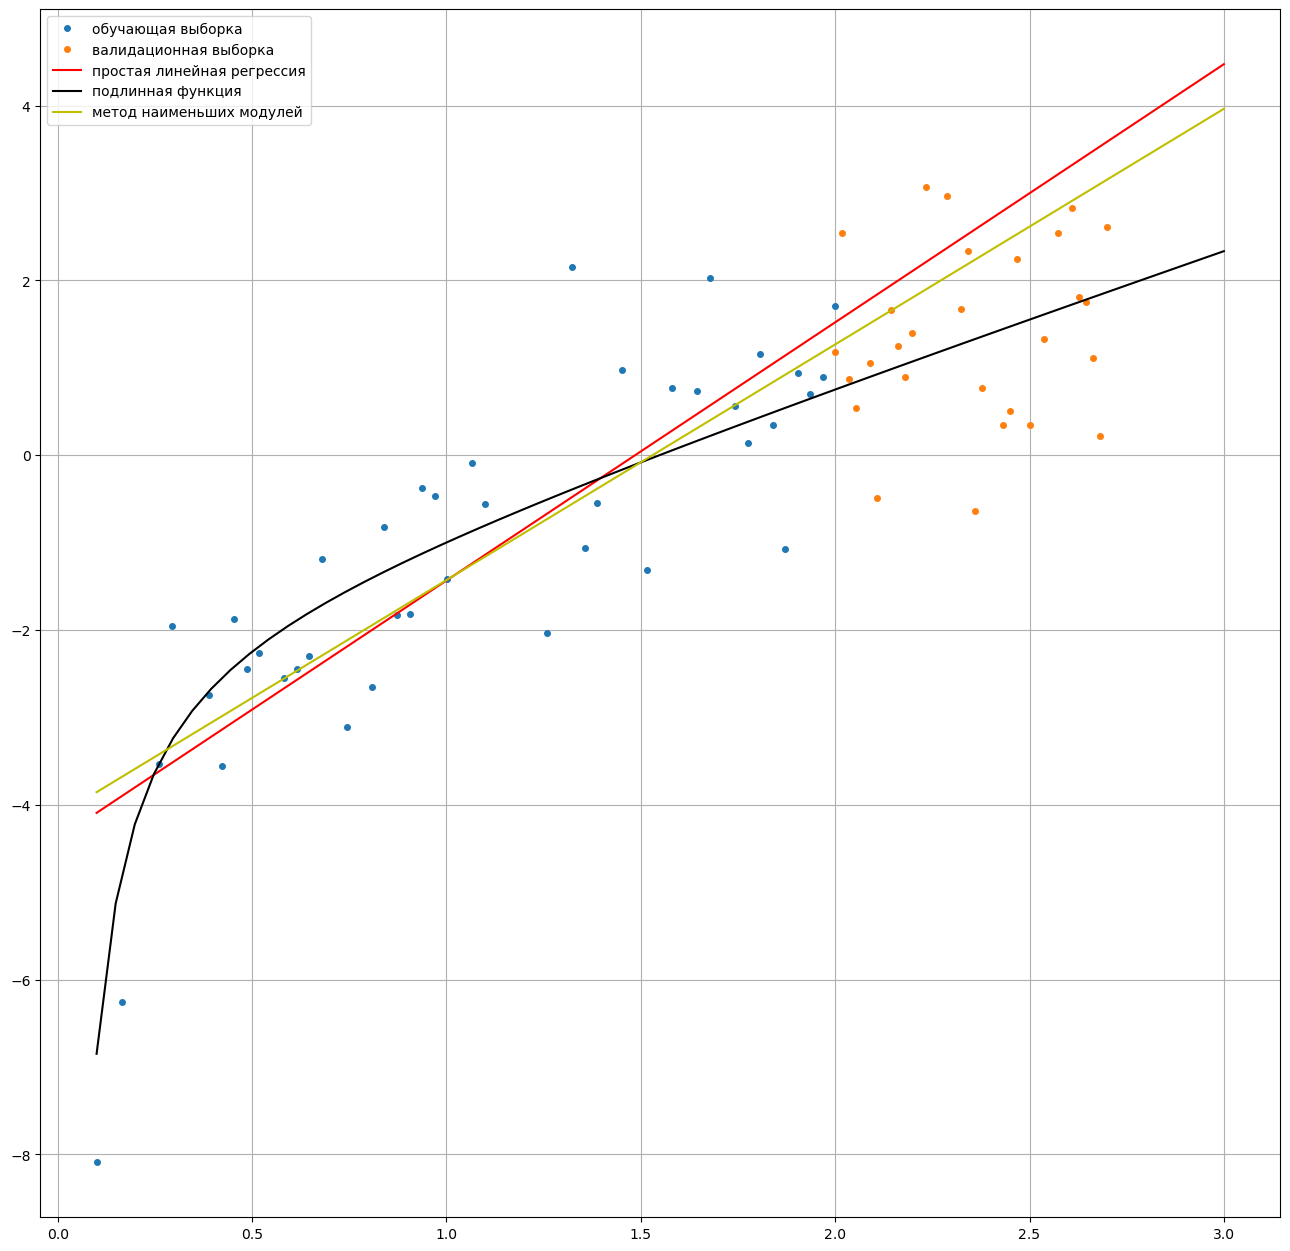

log_likehood = -66.24580110351259
AIC = 0.49118640205468356
AIC_c = 0.8069758757388941
BIC = 139.91874634043378


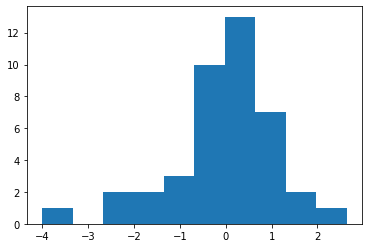

Критерий Шапиро-Уилка
statistic = 0.9414636492729187 pvalue = 0.0352918803691864
распределение ошибок нормальное на уровне значимости 0.05

значение статистики Дарбина-Уотсона: 1.5214116566329785
выборочный коэффициент корреляции r = 0.23929417168351075
гопотеза о некоррелированности не пренимается и не отвергается

значение f-статистики Бройша-Пагана (2.6268693359842548, 0.10506869930596842, 2.66978227553, 0.11031808995005016)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [904]:
coeffs, errors, sigma_hat_2 = lr(X_tukey, X_test_tukey, X1_law, 'простая линейная регрессия', show_method_min_module=True, y_data=y_data_tukey, y_data_test=y_data_test_tukey, X1=X_tukey)
log_likehood = -len(y_data_tukey) / 2.0 * (1 + np.log(2 * np.pi) + np.log(sigma_hat_2))
k = 2
AIC = 2 * k / len(y_data_tukey) + np.log(sigma_hat_2)
AIC_c = AIC + 2 * k * (k + 1) / (len(y_data_tukey) - k - 1)
BIC = k * np.log(len(y_data_tukey)) - 2 * log_likehood
print('log_likehood =', log_likehood)
print('AIC =', AIC)
print('AIC_c =', AIC_c)
print('BIC =', BIC)
# conf_int = t.interval(0.8, df=len(y_data)-2, loc=coeffs[0], scale=coeffs[1])
# print(conf_int)
# plt.plot(conf_int[0], conf_int[1])
errors_test(X_tukey, errors, dl=1.51, du=1.65)

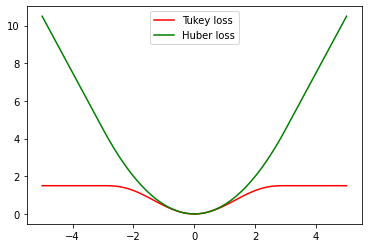

In [701]:
x_loss = np.linspace(-5.0, 5.0, 100)
y_tukey = [tukey_loss(x, 3.0) for x in x_loss]
y_huber = [huber_loss(x, 3.0) for x in x_loss]
plt.plot(x_loss, y_tukey, 'r', label='Tukey loss')
plt.plot(x_loss, y_huber, 'g', label='Huber loss')
plt.legend()
plt.show()

In [915]:
def tukey_loss(a, delta):
    if abs(a) < delta:
        return(delta ** 2 / 6 * (1 - (1 - (a / delta) ** 2) ** 3))
    else:
        return(delta ** 2 / 6)

def huber_loss(a, delta):
    if (abs(a) < delta):
        return(0.5 * a ** 2)
    else:
        return(delta * (abs(a) - delta * 0.5))

def sum_tukey_loss(b):
    X = X1.transpose()
    return sum([tukey_loss(y_data[i] - np.dot(X[i],b), 2) for i in range(len(y_data))])

def sum_huber_loss(b):
    X = X1.transpose()
    return sum([huber_loss(y_data[i] - np.dot(X[i],b), 0.1) for i in range(len(y_data))])

def model_construct(loss, first_approx, method_name):
    X_tukey_huber = X1[['intercept', 'x']]
    model = minimize(loss, first_approx)
    print('RMSE =', np.sqrt(model.fun / len(y_data)))

    plt.figure(figsize=(16, 16), dpi=100)
    plt.grid()
    plt.plot(X1['x'], y_data, 'o', label='обучающая выборка', markersize=4)
    plt.plot(X_test['x'], y_data_test, 'o', label='валидационная выборка', markersize=4)
    plt.plot(h_law, np.dot(X1_law, model.x), 'r', label=method_name)
    plt.plot(h_law, y_law, 'k-', label='подлинная функция')    
    plt.legend()
    plt.show()

RMSE = 0.5184960141297087


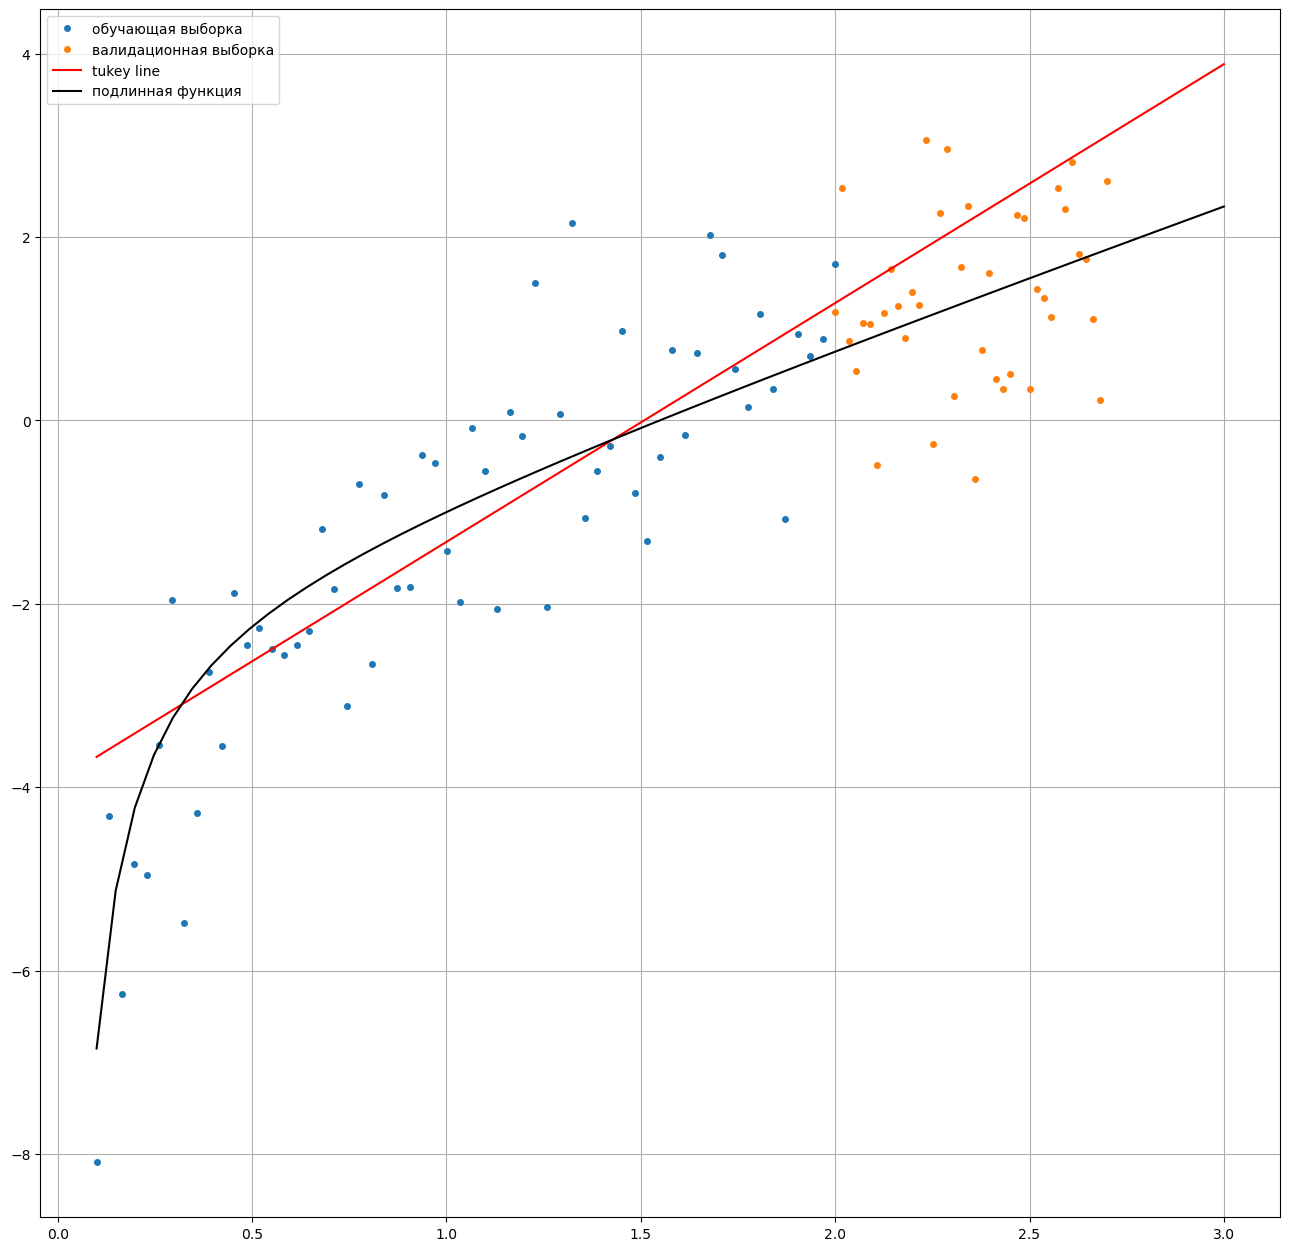

In [916]:
model_construct(sum_tukey_loss, [-4,3], 'tukey line')

RMSE = 0.2849146582243016


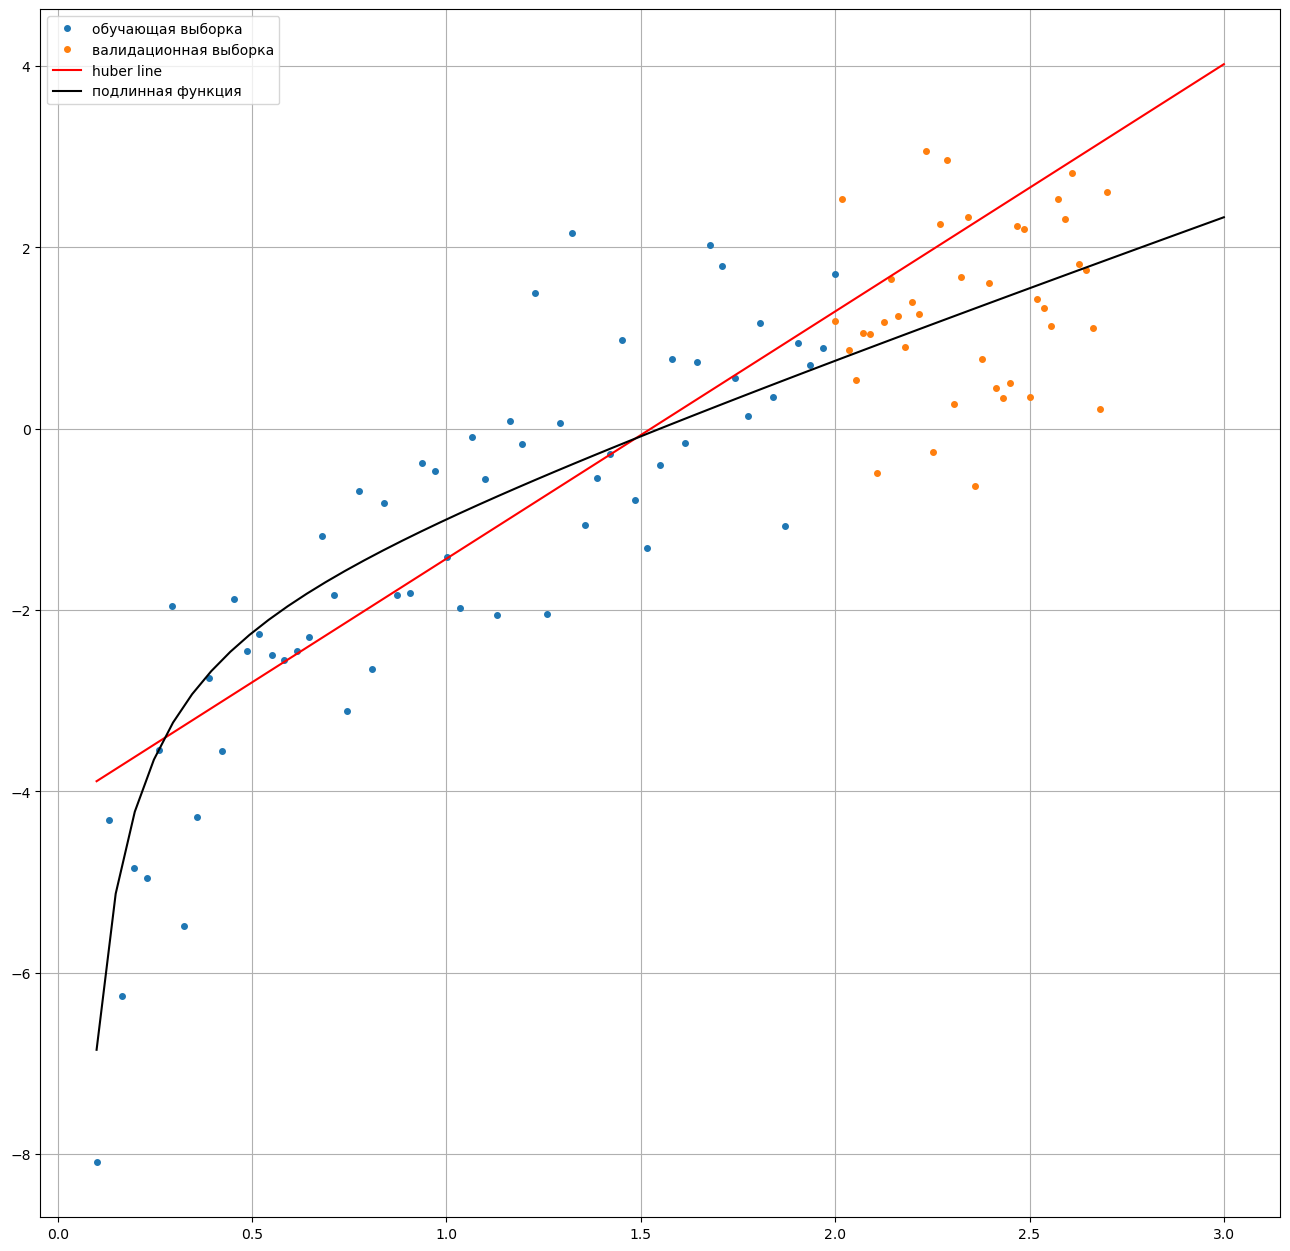

In [917]:
model_construct(sum_huber_loss, [-4,3], 'huber line')

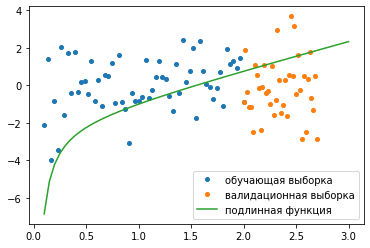

In [803]:
sample_size = 60
delta = 0.9
u_rand = [random.normalvariate(0, sigma**2) for _ in range(sample_size)]
w_rand = [random.uniform(0.0, 1.0) for _ in range(sample_size)]
h_data_quantile = np.linspace(left_bound, right_bound, sample_size)
y_data_quantile = [law_fun(h_data_quantile[i]) +
                   np.abs(u_rand[i]) if w_rand[i] > delta else u_rand[i] for i in range(sample_size)]

test_sample_size = 40
shift = right_bound - left_bound
h_data_test_quantile = np.linspace(left_bound + shift, right_bound + 0.7, test_sample_size)
u_rand = [random.normalvariate(0, sigma**2) for _ in range(test_sample_size)]
w_rand = [random.uniform(0.0, 1.0) for _ in range(test_sample_size)]
h_data_test_quantile = np.linspace(left_bound + shift, right_bound + 0.7, test_sample_size)
y_data_test_quantile = [law_fun(h_data_test_quantile[i]) +
                   np.abs(u_rand[i]) if w_rand[i] > delta else u_rand[i] for i in range(test_sample_size)]

plt.plot(h_data_quantile, y_data_quantile, 'o', label='обучающая выборка', markersize=4)
plt.plot(h_data_test_quantile, y_data_test_quantile, 'o', label='валидационная выборка', markersize=4)
plt.plot(h_law, y_law, '-', label='подлинная функция')
plt.legend()
plt.show()

In [806]:
df_quantile = open('data_quantile.csv', 'w', newline='')
with df_quantile:
    writer = csv.writer(df_quantile)
    writer.writerows([['intercept', 'x_m1', 'x', 'y']])
    for i in range(len(h_data_quantile)):
        writer.writerows([[
            str(1.0),
            str(h_data_quantile[i]**(-1)),
            str(h_data_quantile[i]),
            str(h_data_quantile[i]**2),
            str(y_data_quantile[i])]])

In [807]:
df_quantile = pd.read_csv('data_quantile.csv')
y_data_quantile = df_quantile['y']
X_quantile = df_quantile[['intercept', 'x_m1', 'x']]

In [808]:
df_quantile_test = open('data_quantile_test.csv', 'w', newline='')
with df_quantile_test:
    writer = csv.writer(df_quantile_test)
    writer.writerows([['intercept', 'x_m1', 'x', 'y']])
    for i in range(len(h_data_test_quantile)):
        writer.writerows([[
            str(1.0),
            str(h_data_test_quantile[i]**(-1)),
            str(h_data_test_quantile[i]),
            str(h_data_test_quantile[i]**2),
            str(y_data_test_quantile[i])]])

In [809]:
df_quantile_test = pd.read_csv('data_quantile_test.csv')
y_data_test_quantile = df_quantile_test['y']
X_test_quantile = df_quantile_test[['intercept', 'x_m1', 'x']]

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.02341
Model:                       QuantReg   Bandwidth:                       1.363
Method:                 Least Squares   Sparsity:                        5.232
Date:                Thu, 02 Dec 2021   No. Observations:                   60
Time:                        16:51:03   Df Residuals:                       58
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5866      0.415     -3.824      0.000      -2.417      -0.756
x              0.3018      0.235      1.282      0.205      -0.169       0.773



                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-

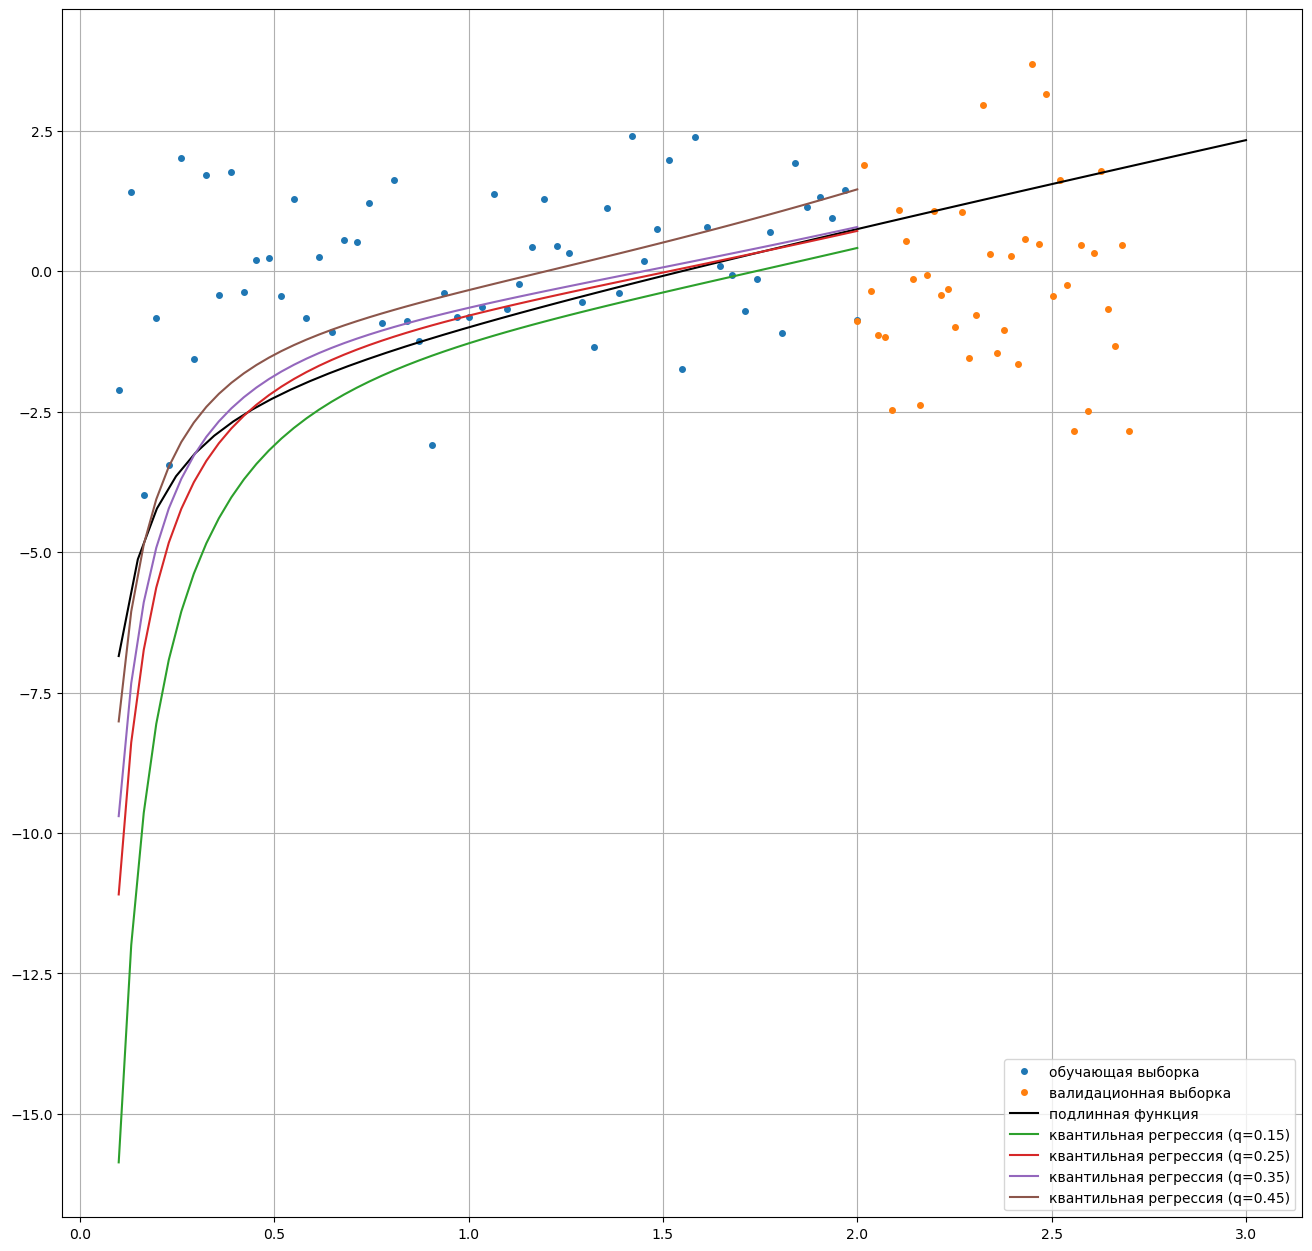

In [879]:
quants = [0.15, 0.25, 0.35, 0.45]

plt.figure(figsize=(16, 16), dpi=100)
plt.grid()
plt.plot(h_data_quantile, y_data_quantile, 'o', label='обучающая выборка', markersize=4)
plt.plot(h_data_test_quantile, y_data_test_quantile, 'o', label='валидационная выборка', markersize=4)
plt.plot(h_law, y_law, 'k-', label='подлинная функция')

for q in quants:
    quant_reg = smf.quantreg("y ~ x", df_quantile).fit(q=q)
    print(quant_reg.summary())
    print('\n\n')
    plt.plot(h_data_quantile, np.dot(X_quantile[['intercept', 'x']], np.array(quant_reg.params)), label='квантильная регрессия (q=' + str(q) + ')')

plt.legend()
plt.show()